In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sensor_data = pd.read_excel('weekday_sensor_data.xlsx')

In [3]:
sensor_data.head()

,page2,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,#,id,TimeStamp,captureTime,phoneVersion,appVersion,currentLuxValue
1,1,5207,"Mon, Jan 10, 2022 08:42 pm",1641840188674,5.1.1,5.26,249.0
2,2,5206,"Mon, Jan 10, 2022 08:42 pm",1641840183671,5.1.1,5.26,252.0
3,3,5205,"Mon, Jan 10, 2022 08:42 pm",1641840178662,5.1.1,5.26,248.0
4,4,5204,"Mon, Jan 10, 2022 08:42 pm",1641840173660,5.1.1,5.26,252.0


In [4]:
sensor_data.drop(['page2'], axis=1, inplace=True)

In [5]:
sensor_data.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,id,TimeStamp,captureTime,phoneVersion,appVersion,currentLuxValue
1,5207,"Mon, Jan 10, 2022 08:42 pm",1641840188674,5.1.1,5.26,249.0
2,5206,"Mon, Jan 10, 2022 08:42 pm",1641840183671,5.1.1,5.26,252.0
3,5205,"Mon, Jan 10, 2022 08:42 pm",1641840178662,5.1.1,5.26,248.0
4,5204,"Mon, Jan 10, 2022 08:42 pm",1641840173660,5.1.1,5.26,252.0


In [6]:
sensor_data.columns = sensor_data.iloc[0]

In [7]:
sensor_data = sensor_data.iloc[1:,:]

In [8]:
sensor_data.head()

,id,TimeStamp,captureTime,phoneVersion,appVersion,currentLuxValue
1,5207,"Mon, Jan 10, 2022 08:42 pm",1641840188674,5.1.1,5.26,249.0
2,5206,"Mon, Jan 10, 2022 08:42 pm",1641840183671,5.1.1,5.26,252.0
3,5205,"Mon, Jan 10, 2022 08:42 pm",1641840178662,5.1.1,5.26,248.0
4,5204,"Mon, Jan 10, 2022 08:42 pm",1641840173660,5.1.1,5.26,252.0
5,5203,"Mon, Jan 10, 2022 08:42 pm",1641840168658,5.1.1,5.26,249.0


In [10]:
sensor_data = sensor_data.query('id >= 2900 & id <= 3660')

In [11]:
sensor_data.head()

,id,TimeStamp,captureTime,phoneVersion,appVersion,currentLuxValue
1548,3660,"Mon, Jan 10, 2022 03:05 pm",1641819972985,5.1.1,5.26,4141.0
1549,3659,"Mon, Jan 10, 2022 03:05 pm",1641819967982,5.1.1,5.26,4418.0
1550,3658,"Mon, Jan 10, 2022 03:05 pm",1641819962971,5.1.1,5.26,3335.0
1551,3657,"Mon, Jan 10, 2022 03:05 pm",1641819957969,5.1.1,5.26,3329.0
1552,3656,"Mon, Jan 10, 2022 03:05 pm",1641819952968,5.1.1,5.26,3319.0


In [12]:
sensor_data.tail()

,id,TimeStamp,captureTime,phoneVersion,appVersion,currentLuxValue
2304,2904,"Mon, Jan 10, 2022 02:02 pm",1641816187063,5.1.1,5.26,5664.0
2305,2903,"Mon, Jan 10, 2022 02:02 pm",1641816182052,5.1.1,5.26,5728.0
2306,2902,"Mon, Jan 10, 2022 02:02 pm",1641816177052,5.1.1,5.26,5726.0
2307,2901,"Mon, Jan 10, 2022 02:02 pm",1641816172050,5.1.1,5.26,5788.0
2308,2900,"Mon, Jan 10, 2022 02:02 pm",1641816167048,5.1.1,5.26,5766.0


In [14]:
sensor_data['currentLuxValue'] = sensor_data['currentLuxValue'].astype('float64')

In [15]:
sensor_data['currentLuxValue'].describe()

count     761.000000
mean     4576.419185
std      1360.825801
min       239.000000
25%      3791.000000
50%      4237.000000
75%      4924.000000
max      9611.000000
Name: currentLuxValue, dtype: float64

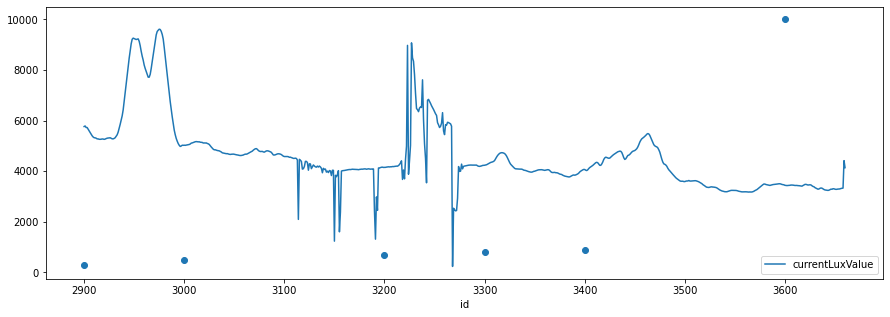

In [24]:
sensor_data.plot(x='id', y='currentLuxValue', figsize=(15,5))
_ = plt.scatter([2900,3000,3200,3300,3400,3600], [300,500,700,800,900,10000])

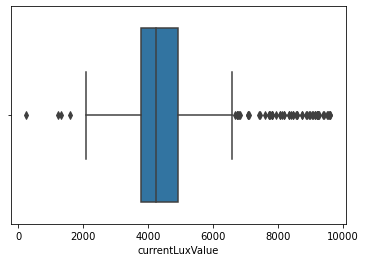

In [17]:
ax = sns.boxplot(x=sensor_data["currentLuxValue"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


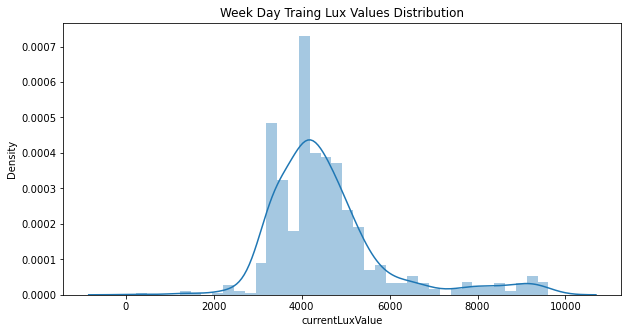

In [86]:
plt.figure(figsize=(10,5))
ax = sns.distplot(sensor_data['currentLuxValue'])
_ = plt.title('Week Day Traing Lux Values Distribution')

In [18]:
sensor_data.query('currentLuxValue > 6000').shape

(77, 6)

In [34]:
new_sensor_data = sensor_data.query('currentLuxValue < 7000')

In [89]:
import numpy as np

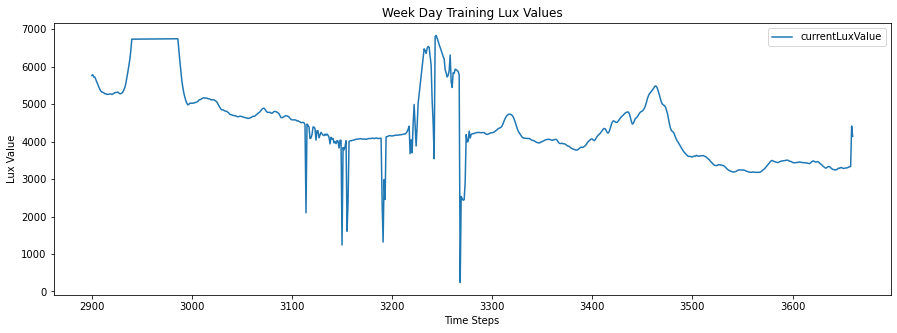

In [92]:
new_sensor_data.plot(x='id', y='currentLuxValue', figsize=(15,5))
_ = plt.title('Week Day Training Lux Values')
_ = plt.xlabel('Time Steps')
_ = plt.ylabel('Lux Value')

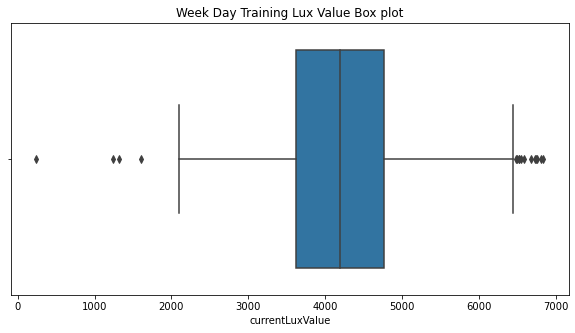

In [87]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x=new_sensor_data["currentLuxValue"])
_ = plt.title('Week Day Training Lux Value Box plot')

In [70]:
results = pd.read_excel('weekday_results.xlsx')

In [71]:
results.head()

,page1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,#,id,TimeStamp,LuxValue,score,anomaly_prob,anomaly,season,day,month
1,1,748,"Mon, Jan 10, 2022 09:50 pm",3450,5664,0.232,0,Day,2,8
2,2,747,"Mon, Jan 10, 2022 09:49 pm",3580,5664,0.232,0,Day,2,8
3,3,746,"Mon, Jan 10, 2022 09:49 pm",5630,5664,0.299,0,Day,2,8
4,4,745,"Mon, Jan 10, 2022 09:49 pm",4289,5664,0.151,0,Day,2,8


In [72]:
results.drop(['page1'], axis=1, inplace=True)

In [73]:
results.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,id,TimeStamp,LuxValue,score,anomaly_prob,anomaly,season,day,month
1,748,"Mon, Jan 10, 2022 09:50 pm",3450,5664,0.232,0,Day,2,8
2,747,"Mon, Jan 10, 2022 09:49 pm",3580,5664,0.232,0,Day,2,8
3,746,"Mon, Jan 10, 2022 09:49 pm",5630,5664,0.299,0,Day,2,8
4,745,"Mon, Jan 10, 2022 09:49 pm",4289,5664,0.151,0,Day,2,8


In [74]:
results.columns = results.iloc[0]

In [75]:
results = results.iloc[1:]

In [76]:
results.head(25)

,id,TimeStamp,LuxValue,score,anomaly_prob,anomaly,season,day,month
1,748,"Mon, Jan 10, 2022 09:50 pm",3450,5664,0.232,0,Day,2,8
2,747,"Mon, Jan 10, 2022 09:49 pm",3580,5664,0.232,0,Day,2,8
3,746,"Mon, Jan 10, 2022 09:49 pm",5630,5664,0.299,0,Day,2,8
4,745,"Mon, Jan 10, 2022 09:49 pm",4289,5664,0.151,0,Day,2,8
5,744,"Mon, Jan 10, 2022 09:49 pm",4235,5664,0.151,0,Day,2,8
6,743,"Mon, Jan 10, 2022 09:49 pm",6730,2220,0.7,1,Day,2,8
7,742,"Mon, Jan 10, 2022 09:49 pm",5963,5664,0.333,0,Day,2,8
8,741,"Mon, Jan 10, 2022 09:49 pm",3471,5664,0.232,0,Day,2,8
9,740,"Mon, Jan 10, 2022 09:49 pm",5600,5664,0.299,0,Day,2,8
10,739,"Mon, Jan 10, 2022 09:48 pm",2400,4184,0.567,1,Day,2,8


<AxesSubplot:xlabel='id', ylabel='LuxValue'>

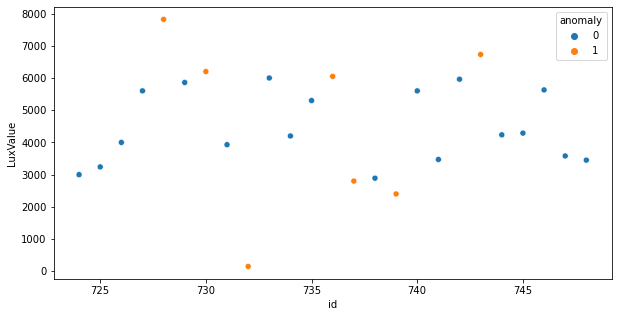

In [77]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=results.iloc[0:25], x="id", y="LuxValue", hue='anomaly')

In [78]:
anomaly_subset = results.iloc[0:25].query('anomaly == 1')
anomaly_subset.head(20)

,id,TimeStamp,LuxValue,score,anomaly_prob,anomaly,season,day,month
6,743,"Mon, Jan 10, 2022 09:49 pm",6730,2220,0.7,1,Day,2,8
10,739,"Mon, Jan 10, 2022 09:48 pm",2400,4184,0.567,1,Day,2,8
12,737,"Mon, Jan 10, 2022 09:48 pm",2800,4360,0.519,1,Day,2,8
13,736,"Mon, Jan 10, 2022 09:47 pm",6050,2772,0.675,1,Day,2,8
17,732,"Mon, Jan 10, 2022 09:46 pm",150,2220,0.883,1,Day,2,8
19,730,"Mon, Jan 10, 2022 09:45 pm",6200,2772,0.675,1,Day,2,8
21,728,"Mon, Jan 10, 2022 09:44 pm",7820,1488,0.763,1,Day,2,8


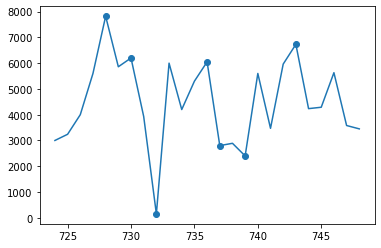

In [82]:
#results.iloc[0:25].query('LuxValue < 10000').plot(x='id', y = 'LuxValue', figsize=(8,5))
_ = plt.plot(results.iloc[0:25]['id'], results.iloc[0:25]['LuxValue'])
_ = plt.scatter(x=anomaly_subset['id'], y=anomaly_subset['LuxValue'])
plt.show()